# Effects of user characteristics on Ford Go-Bike rent duration

## Investigation Overview
This investigation aims to analyze the main user characteristics that impacts duration of riding Ford Go-Bike.

## DataSet Overview
This DataSet contains 183412 samples for Ford Go-Bike, each sample has 16 features which as made in 2019. Some of these features are replaced with other features for better Visulaization, as<br><br> "duration_sec"  to  "duration_min"<br>"member_birth_year"  to  "member_age"<br>"start_time"  to  "hour_start" & "day_start".<br><br> Besides that some of NaN values are dropped reaching at the end a dataset with shape 171305 samples x 20 features.

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fivethirtyeight')

%matplotlib inline

In [15]:
# Loading DataSet into Pandas Dataframe
df = pd.read_csv('fordgobike_tripdata.csv')

In [16]:
#Dropping NaN's in most important features for me
df.dropna(subset=['member_birth_year'],inplace=True)
df.dropna(subset=['member_gender'],inplace=True)

df.dropna(subset=['start_station_name'],inplace=True)
df.dropna(subset=['end_station_name'],inplace=True)

In [17]:
#Rechecking for NaN values for most important features
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [18]:
#Dropping Other gender
df.drop(df.index[df['member_gender'] == 'Other'],inplace=True)

In [19]:
#Changing dtype of start & time from str obj  to  datetime
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [20]:
#Converting rent duration to min for better understanding
df['duration_min'] = df['duration_sec']/60

In [21]:
#Getting member age to use in analysis rather than member_birth_year
df['member_age'] = 2019 - df['member_birth_year']

In [22]:
#Adding new columns "Day Start" & "Hour Start"
df["hour_start"] = df['start_time'].dt.hour
df["day_start"] = df['start_time'].dt.weekday_name


### Distribution of Trips Duration   
**What might be the avg duration for bikes & How would duartion distribution looks?**<br><br>It is clear as shown in the figure below that the duration distribution is roughly centred at average value = 11 min with min & max values 1 min & about 100 min respectively. Some outliers values were found after max values, these outliers region were found under red arrow in the figure below and a detailed view will be discussed later.


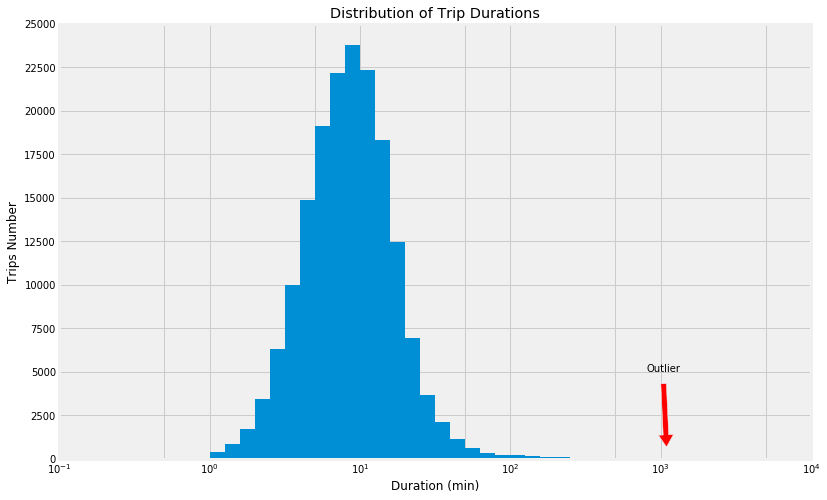

In [23]:
bins = 10 ** np.arange(-2,8+0.1,0.1)
plt.figure(figsize=[12,8])
plt.hist(data=df,x='duration_min',bins=bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Trips Number')
plt.xscale('log')
plt.xlim([0.1,1e4])
plt.xticks([0.1,0.5,1,5,10,5e1,1e2,5e2,1e3,5e3,1e4])
plt.yticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000])
arrow_properties = dict(
    facecolor="red", width=5.5,
    headwidth=15, shrink=0.1)
plt.annotate('Outlier',xy=(1100,200),xytext=(800,5000),arrowprops=arrow_properties);

### Zooming in outlier region
As mentioned above, here we can see a detailed view for outliers region under red arrow in figure above. Outlier values are close to each other with values 900 & 1000 min that occured for about 25 rides.

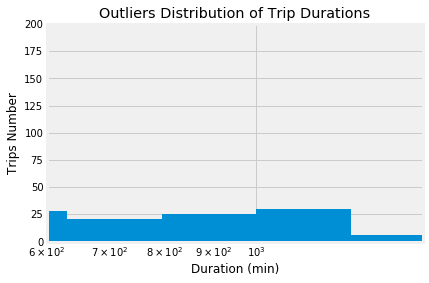

In [24]:
#Zooming in outlier region
bins = 10 ** np.arange(-2,8+0.1,0.1)
plt.hist(data=df,x='duration_min',bins=bins)
plt.title('Outliers Distribution of Trip Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Trips Number')
plt.xscale('log')
plt.xlim([600,1500])
plt.ylim([0,200]);

### Gender & Customer proportion
**1.What is percentge of Males vs Females riding bikes?**<br> **2.What is percentge of Customers vs Subscribers riding bikes?**<br><br> We can See here in the left Pie Plot, that more than 2 thirds of gender riding bikes are males with percentage 76.2% which gives an intuition that males are more interested in riding bikes than females specially they can use them when going to work.<br><br> In the right Pie Plot we can see that almost 91% of users are Subscribers, which gives an intuition that most of users use the bikes for special purposes as going to work as mentioned besides that might there is an portion from the 91% uses bikes for fun and only the left 9% are Customers which ride bikes only for fun or needing it for one use.

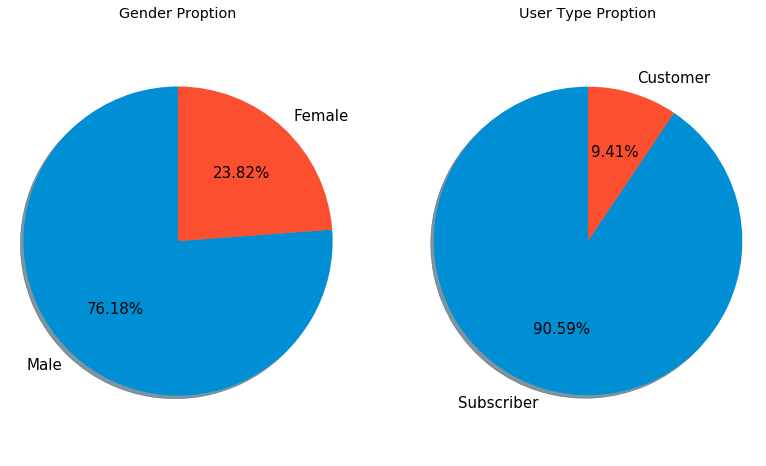

In [27]:
gender_no = df.member_gender.value_counts()
user_no = df.user_type.value_counts()


plt.figure(figsize=[12,8])

plt.subplot(1,2,1)
plt.pie(gender_no,labels=gender_no.keys(),startangle=90,autopct = '%1.2f%%',shadow = True,textprops = {"fontsize":15})
plt.title('Gender Proption')
plt.axis('equal')


plt.subplot(1,2,2)
plt.pie(user_no,labels=user_no.index,startangle=90,autopct = '%1.2f%%',shadow = True,textprops = {"fontsize":15})
plt.title('User Type Proption')
plt.axis('equal');

### Gender Proprtion Subscribed vs Customer
**1.What is percentge of males riding bikes compared to females considered Subscribers?<br> 2.What is percentge of males riding bikes compared to females considered Customers?**<br><br>These Pie Plots are clearly logic, at which we mentioned that males portion exceeds 2 thirds so it will be intuitive for males to exceeds females in both Subscribers & Customers users with also 2 thirds in portion


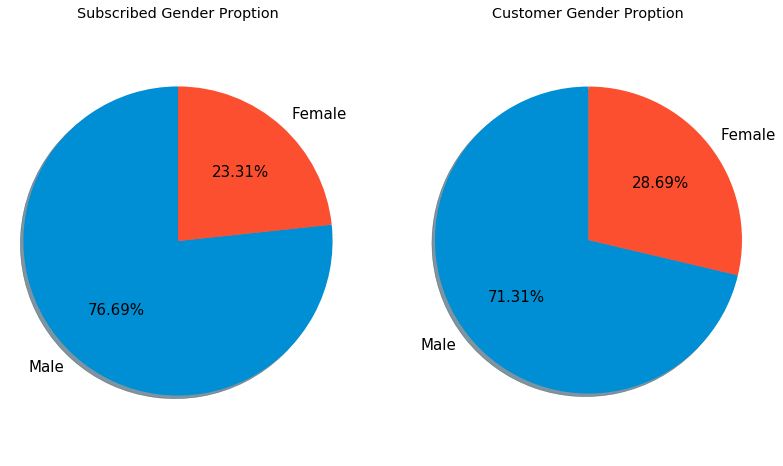

In [29]:
sub_filt = df[df['user_type'] == 'Subscriber']
cust_filt = df[df['user_type'] == 'Customer']
gender_sub_no = sub_filt.member_gender.value_counts()
gender_cust_no = cust_filt.member_gender.value_counts()


plt.figure(figsize=[12,8])

#Subscribed No for each gender
plt.subplot(1,2,1)
plt.pie(gender_sub_no,labels=gender_sub_no.index,startangle=90,autopct = '%1.2f%%',shadow = True,textprops = {"fontsize":15})
plt.title('Subscribed Gender Proption')
plt.axis('equal');

plt.subplot(1,2,2)
plt.pie(gender_cust_no,labels=gender_cust_no.index,startangle=90,autopct = '%1.2f%%',shadow = True,textprops = {"fontsize":15})
plt.title('Customer Gender Proption')
plt.axis('equal');

### Top Ten Start States vs Top Ten End States distribution
**1. What are top ten start stations when starting the ride?<br>**
**2. What are top ten end stations when ending the ride?**<br><br>In the first graph.<br><br> As we can see in both figures top 10 stations are represented at both the start & end of trips.<br><br>As we can see in upper figure, top 2 stations are much closer to each other compared with other stations reaching a value about 3500 which represents that users has started taking bikes 3500 times from these 2 stations which are "Market St at 10th St" & "San Francisco Caltrain Station 2".<br><br>This explains that might be some activates close these stations allowing users to use bikes.<br><br>In the bottom figure, we found that almost the most station that users end their ride at is "San Francisco Caltrain Station 2" with value about 5000 times.

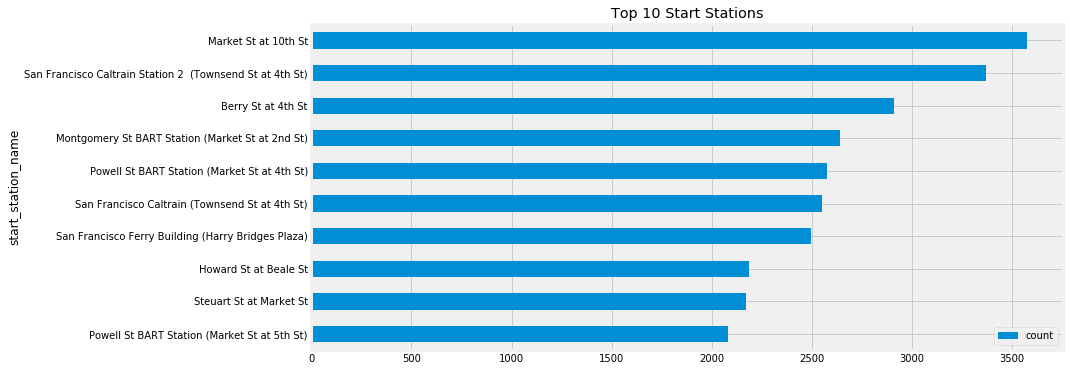

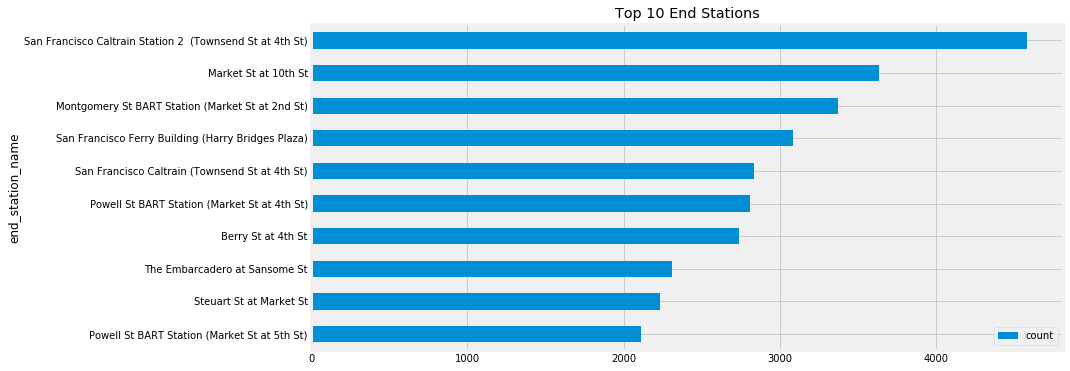

In [30]:
top_ten_start_states = df.start_station_name.value_counts()[:10]
top_ten_end_states = df.end_station_name.value_counts()[:10]
base_color = sb.color_palette()[0]

top_ten_start_states_df = top_ten_start_states.to_frame()
top_ten_end_states_df = top_ten_end_states.to_frame()
top_ten_start_states_df = top_ten_start_states_df.reset_index()
top_ten_end_states_df = top_ten_end_states_df.reset_index()

top_ten_start_states_df.rename(columns={'index':'start_station_name','start_station_name':'count'},inplace=True)
top_ten_end_states_df.rename(columns={'index':'end_station_name','end_station_name':'count'},inplace=True)



ax=top_ten_start_states_df.plot.barh(y='count',x='start_station_name',color=base_color,title='Top 10 Start Stations',figsize=(12,6))
ax.invert_yaxis()


ax1=top_ten_end_states_df.plot.barh(y='count',x='end_station_name',color=base_color,title='Top 10 End Stations',figsize=(12,6))
ax1.invert_yaxis()

### Member age & Duration correlation
**Which range of age makes more ride duration?**<br><br>
The left figure represents the coloration between duration in min with age in years; we can that most duration distribution is concentrated in age range 20-60 years with values reaching about 100 min. We can see that at age 30 years, there are much duration distribution reaching a value about 200 min, the same age has much higher duration values reaching 1200 min compared to other ages. <br><br>The right figure gives a better visualization illustrating last point mentioned, which we can see that at age 30 there are much greater duration distribution than other ages which gives an intuition that age of 30 years is important to attract more using bikes.

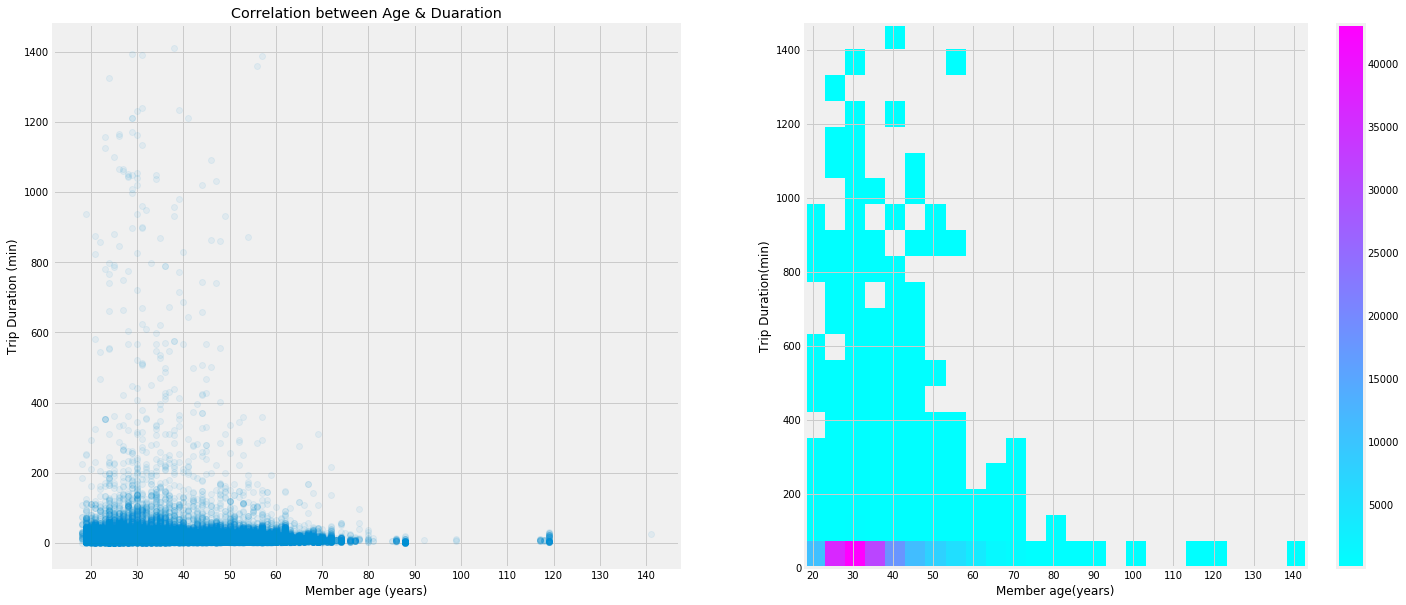

In [31]:
plt.figure(figsize=[22,10])

plt.subplot(1,2,1)
sb.regplot(data=df,x='member_age',y='duration_min',fit_reg=False,scatter_kws={'alpha': 1/15})
plt.xticks([20,30,40,50,60,70,80,90,100,110,120,130,140])
plt.title('Correlation between Age & Duaration')
plt.xlabel('Member age (years)')
plt.ylabel('Trip Duration (min)')

plt.subplot(1,2,2)
bins_x = np.arange(18,141+5,5)
bins_y = np.arange(1,1409+70,70)

plt.hist2d(data=df,x='member_age',y='duration_min',cmin=0.5,cmap='cool',bins=[bins_x,bins_y])
plt.xticks([20,30,40,50,60,70,80,90,100,110,120,130,140])
plt.colorbar()
plt.xlabel('Member age(years)')
plt.ylabel('Trip Duration(min)');

In [39]:
hour_counts = df.groupby(['day_start','hour_start']).size()
hour_counts = hour_counts.reset_index(name = 'count')
hour_counts = hour_counts.pivot(index = 'hour_start', columns = 'day_start', values = 'count')
col_names = ['Monday','Sunday','Tuesday','Wednesday','Thursday','Friday','Saturday']
hour_counts = hour_counts.reindex(columns=col_names)

### Start time with Start Day bike usage
**In what days & at what times bikes are most used?**<br><br>This figure illustrates the what days & which time bikes are most used. The brighter regions indicates that bikes are most used, so we can find all days except Saturday & Sunday at 8 & at 17 bikes are most used which gives us an intuation that some activites are related to this time as going to work.

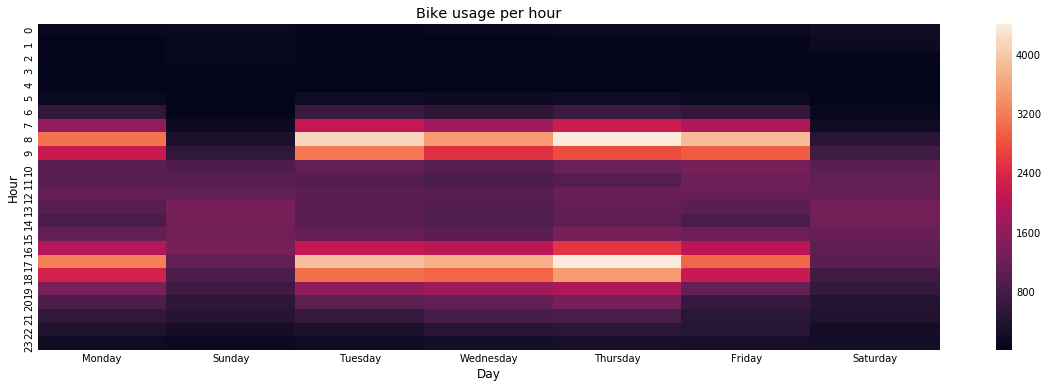

In [42]:
plt.figure(figsize=(18, 6))
sb.heatmap(hour_counts)
plt.title('Bike usage per hour')
plt.ylabel('Hour')
plt.xlabel('Day');

### Duration per day
This plot isllustartes the relation between start day & duration of trip in that day. The vilion shape in this graph represents this relation between the start time & duaration in that day, at which the horizontal aspect represents the amount of distribution of data in region of duration.<br> In duration range up to 20 min, Thursday seems to have the more contribution in this duration region.<br> But at Saturday, we can see has least contribution in duration region up to 20 min.<br> While at Saturday & Sunday both have more duration contribution than other days of the week which is logic as these days are weekends.

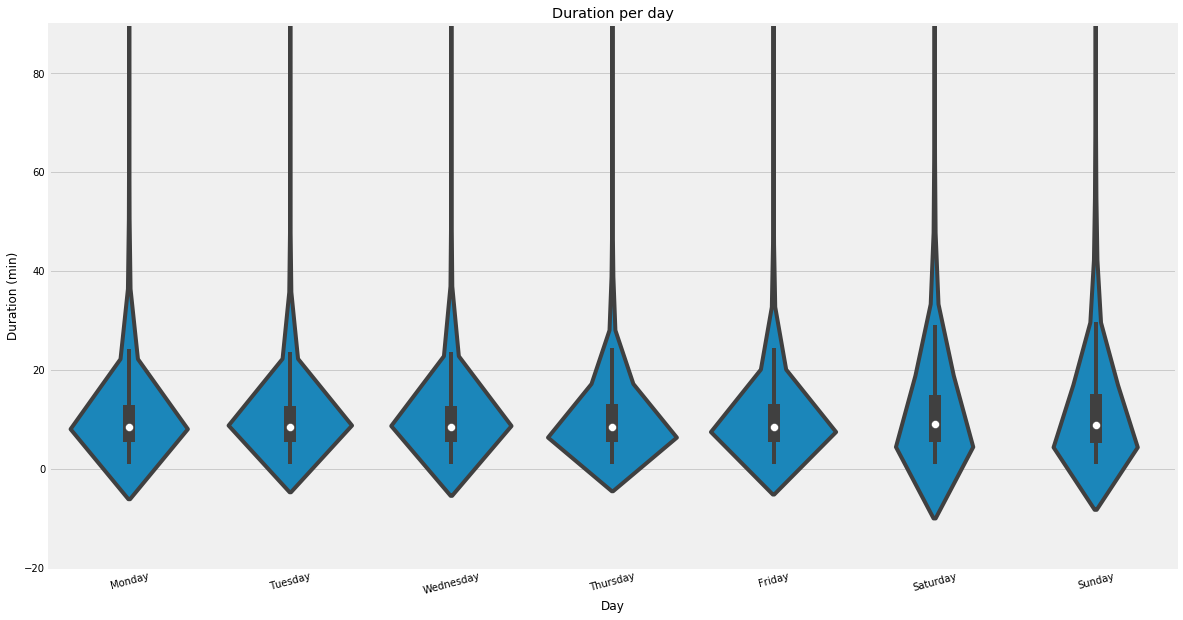

In [35]:
plt.figure(figsize=[18,10])

sb.violinplot(data=df,x='day_start',y='duration_min',color=base_color,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylim(-20,90)
plt.title('Duration per day')
plt.ylabel('Duration (min)')
plt.xlabel('Day')
plt.xticks(rotation=15);

### Gender & Duration Relation
**Which gender makes greater duration?**<br>Although that portion of Females is higher than Males, this figure illustrates that avg duration done by Females is greater than Males.

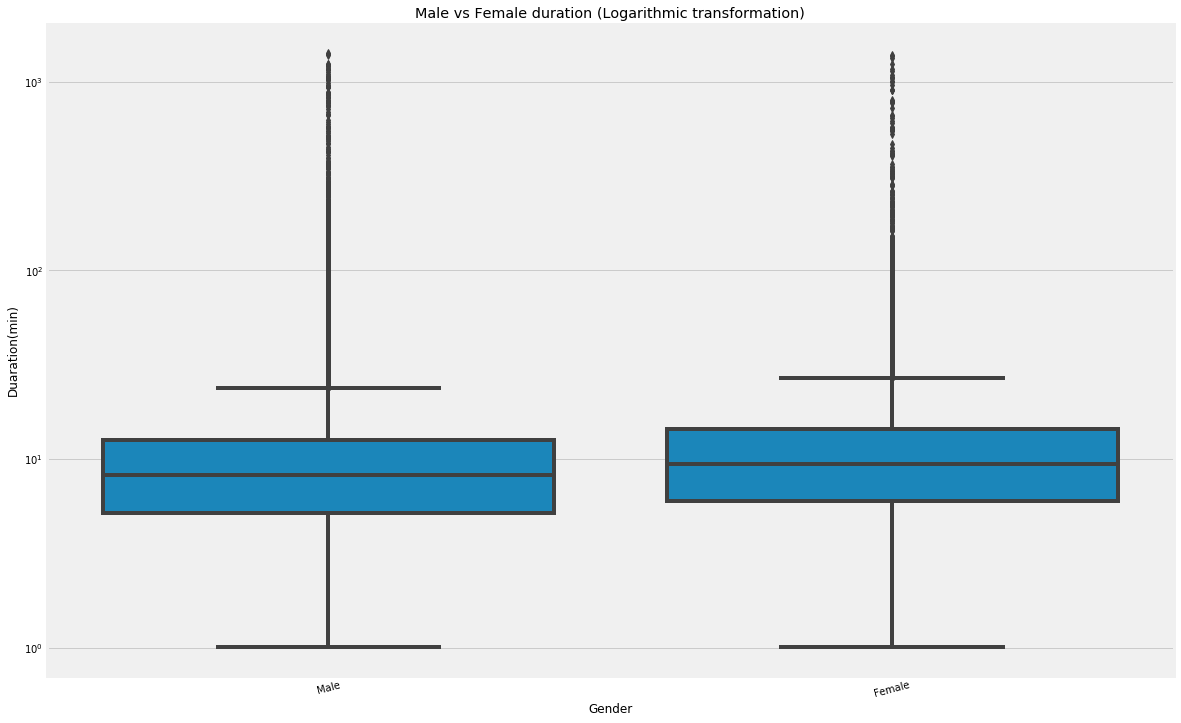

In [38]:
plt.figure(figsize=[18,12])

plt.title('Male vs Female duration (Logarithmic transformation)')
sb.boxplot(data=df,x='member_gender',y='duration_min',color=base_color)
plt.yscale('log')
plt.xlabel('Gender')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15);

### User Type & Duration Relation
**Which user type makes greater duration?**<br>Although that portion of Subscribers is much higher than Customers, this figure illustrates that avg duration done by Customers is greater than Subscribers.

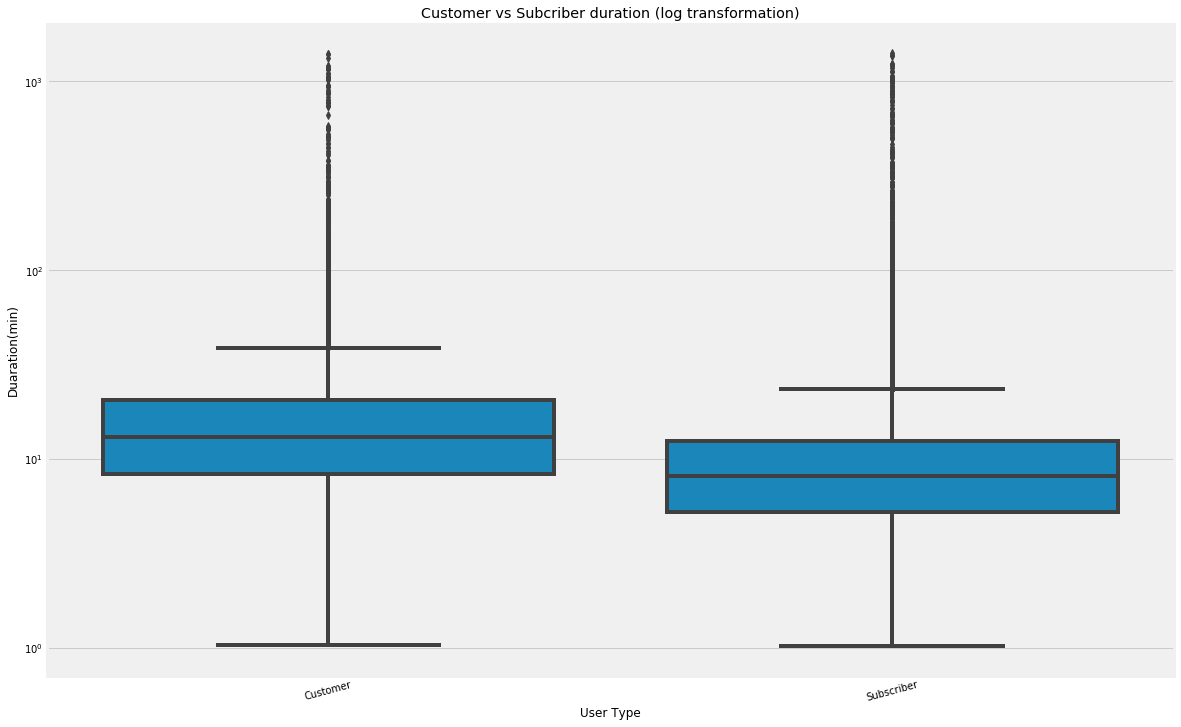

In [40]:
plt.figure(figsize=[18,12]) 

plt.title('Customer vs Subcriber duration (log transformation)')
sb.boxplot(data=df,x='user_type',y='duration_min',color=base_color)
plt.yscale('log')
plt.xlabel('User Type')
plt.ylabel('Duaration(min)')
plt.xticks(rotation=15);

### Age & Day Start with Duration distribution
**Is there unique members ages making high duration in unique days?**<br><br>.In the below figure, we can see that each day has its unique colour which gives us an intuition that almost all member ages specially at range 20-40 years ride bikes at Friday with values reaching 200 min. This is because most of Friday's data distribution is more dominant than other days.<br><br>Saturday also contributes when riding bikes, epically at age about 30 years.<br><br>In all days most of the data distribution is concentrated at duration = 200 min. Besides that, high ages almost ride bikes at Friday making very small duration compared to others which is logic.

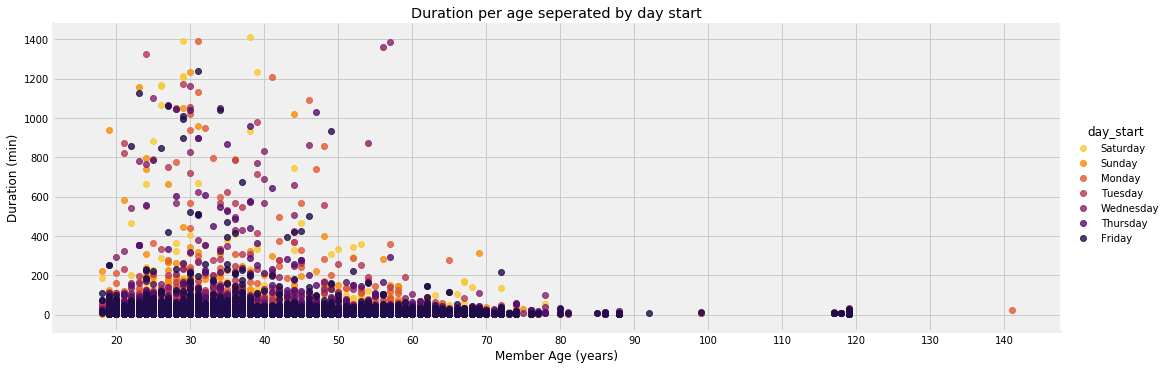

In [48]:
g = sb.FacetGrid(data=df,hue='day_start',palette='inferno_r',hue_order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'],height=5,aspect=3)
g = g.map(sb.regplot,'member_age','duration_min',fit_reg=False)
plt.xticks([20,30,40,50,60,70,80,90,100,110,120,130,140])
g.add_legend()
plt.title('Duration per age seperated by day start')
plt.xlabel("Member Age (years)")
plt.ylabel('Duration (min)');

### Age & User Type with Duration distribution
**Within users age, which user type contributes more in riding bikes?**<br><br>It is logic to found in the graph below that contribution of Subscribers in riding bikes is more than Customers, as we found in the above Pie Chart that almost 91% of users are Subscribers. This contribution reaching a duration with age 100 min.<br><br>At age of 30, we can see some concentration of Customer's data distribution at duration of 150 min.<br><br>At age of 19, almost all users Customers which is logic at which they will need to ride bikes for fun.

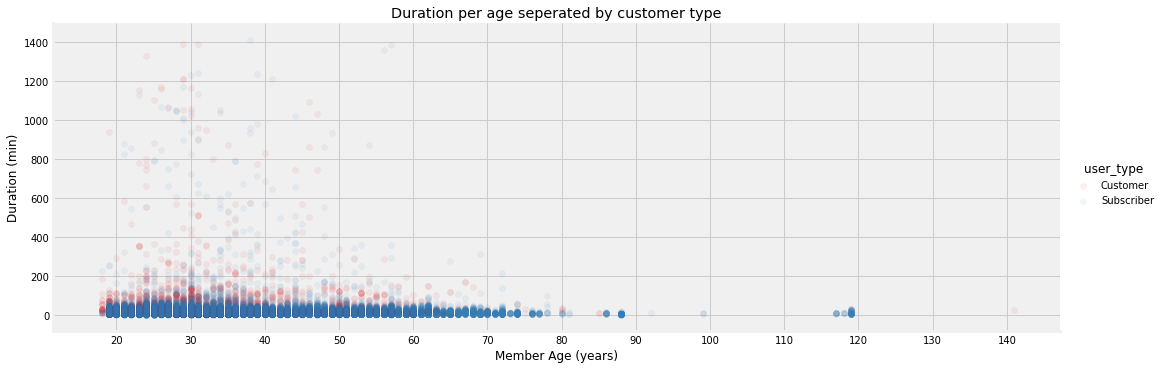

In [47]:
g = sb.FacetGrid(data=df,hue='user_type',palette='Set1',hue_order=['Customer','Subscriber'],height=5,aspect=3)
g = g.map(plt.scatter,'member_age','duration_min',alpha=1/15)
plt.xticks([20,30,40,50,60,70,80,90,100,110,120,130,140])
g.add_legend()
plt.title('Duration per age seperated by customer type')
plt.xlabel("Member Age (years)")
plt.ylabel('Duration (min)');

### Age & Gender with Duration distribution
**Within users age, which gender contributes more in riding bikes?**<br><br>It is logic to found in the graph below that contribution of Males in riding bikes is more than Females, as we found in the above Pie Chart that almost 76% of users are Males. This contribution reaching a duration with age 100 min. <br><br>We can see at age of 30, Females make higher duration than males at which in almost all ages females make higher duration but at age of 30 years difference between females and males in duration is much higer. <br><br>Also we can see at high ages, most of users are females making small durations compared to other ages which is logic.

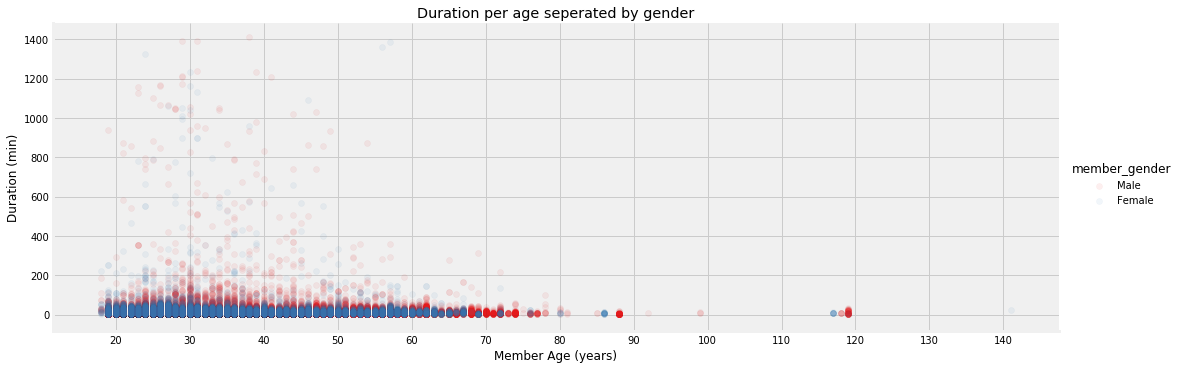

In [49]:
g = sb.FacetGrid(data=df,hue='member_gender',palette='Set1',hue_order=['Male','Female'],height=5,aspect=3)
g = g.map(plt.scatter,'member_age','duration_min',alpha=1/15)
plt.xticks([20,30,40,50,60,70,80,90,100,110,120,130,140])
g.add_legend()
plt.title('Duration per age seperated by gender')
plt.xlabel("Member Age (years)")
plt.ylabel('Duration (min)');

### Day Start & User Type with Duration distribution
**Within days of the week, which user type makes higher duration?**<br><br>Although we said above that portion of Subscribers is much higher than Customers with 91%, we found in the graph below that in all days of the week Customers make higher durations in average than Subscribers at which the average value is represented by line in middle of box and points found on the top of box represents the outlier values. <br><br>At Sunday & Saturday, we can see a much higher in duration average for Customers compared to rest days of the week. Saturday & Sunday are considered weekends in Europe which explains why they have much higher duration

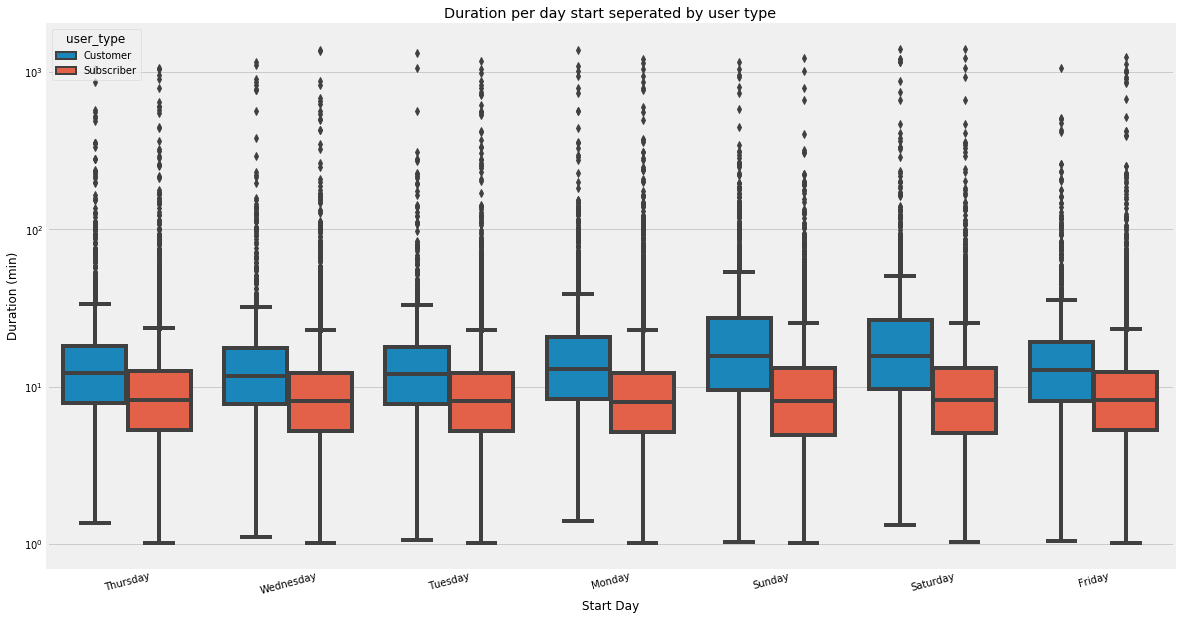

In [46]:
plt.figure(figsize=[18,10])
sb.boxplot(data = df, x = 'day_start', y = 'duration_min', hue = 'user_type')
plt.yscale('log')
plt.xticks(rotation=15)
plt.title('Duration per day start seperated by user type')
plt.xlabel('Start Day')
plt.ylabel('Duration (min)');